In [1]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from relation import Scaling

In [3]:
s = Scaling('140','')

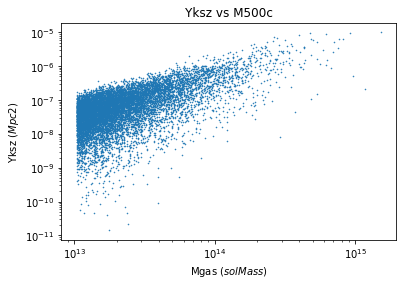

In [4]:
s.plot_Y_M()

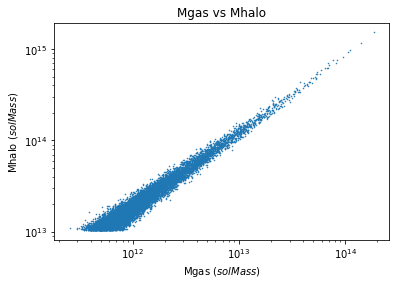

In [5]:
s.gas_halo_relation()

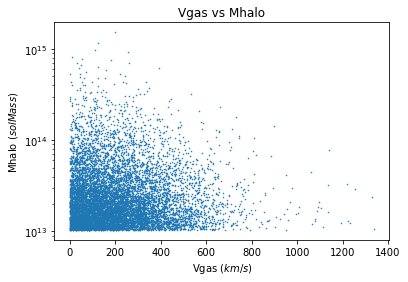

In [6]:
s.velo_halo_relation('z')

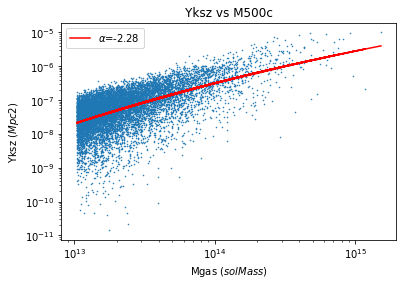

In [7]:
s.plot_Y_M_fit()